In [38]:
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D

In [39]:
Line2D.markers

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('../DEV/ClinVar_VEPanno_filterNonCoding_08_12_2021.xlsx')

In [4]:
df


,chr,pos,ref,alt,id,clinvar link,rev. status,clinical condition,Interpretation,gene,effect,hgvsp,hgvsc,AF exome,het. Individuals exome,hom. Individuals exome,AF genome,het. Individuals genome,hom. Individuals genome
0,10,89712021,G,C,427623,NaN,reviewed_by_expert_panel,Cowden_syndrome_1|PTEN_hamartoma_tumor_syndrom...,Likely_pathogenic,PTEN,splice_region_variant&intron_variant|splice_re...,NaN,ENST00000371953.3:c.634+5G>C|ENST00000472832.1...,NaN,NaN,NaN,NaN,NaN,NaN
1,10,89717607,C,G,427599,NaN,reviewed_by_expert_panel,Hereditary_cancer-predisposing_syndrome|PTEN_h...,Likely_pathogenic,PTEN,splice_region_variant&intron_variant|splice_re...,NaN,ENST00000472832.1:n.62-3C>G|NM_001304717.5:c.1...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,48033887,AAACTTTTTTTTTTTTTTTTTTAA,TTAAAAAAAAAAAAAAAAAAGTTT,89514,NaN,reviewed_by_expert_panel,Lynch_syndrome,Pathogenic,MSH6,intron_variant|splice_region_variant&intron_va...,NaN,|ENST00000540021.1:c.3612-31_3612-8inv|NM_0001...,NaN,NaN,NaN,NaN,NaN,NaN
3,2,47708010,G,A,91021,NaN,reviewed_by_expert_panel,Lynch_syndrome|Hereditary_cancer-predisposing_...,Pathogenic,MSH2,splice_region_variant&synonymous_variant|splic...,|ENSP00000442697.1:p.Glu812=|NP_000242.1:p.Glu...,ENST00000461394.1:n.75G>A|NM_001258281.1:c.243...,NaN,NaN,NaN,NaN,NaN,NaN
4,2,47641557,G,A,91251,NaN,reviewed_by_expert_panel,Lynch_syndrome,Pathogenic,MSH2,splice_region_variant&synonymous_variant,ENSP00000442697.1:p.Gln248=|NP_000242.1:p.Gln3...,NM_001258281.1:c.744G>A|ENST00000543555.1:c.74...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,5,112152119,A,G,823173,NaN,criteria_provided|_single_submitter,Hereditary_cancer-predisposing_syndrome,Likely_pathogenic,APC,intron_variant|intron_variant&NMD_transcript_v...,NaN,NM_001354896.2:c.933+829A>G|NM_001354906.2:c.8...,NaN,NaN,NaN,NaN,NaN,NaN
441,5,112162799,A,G,265373,NaN,criteria_provided|_single_submitter,not_provided,Likely_pathogenic,APC,intron_variant&non_coding_transcript_variant|s...,NaN,ENST00000502371.1:n.96+5111A>G|NM_001354904.2:...,NaN,NaN,NaN,NaN,NaN,NaN
442,5,112162800,A,G,411406,NaN,criteria_provided|_single_submitter,Familial_adenomatous_polyposis_1,Pathogenic,APC,intron_variant&non_coding_transcript_variant|s...,NaN,NM_001127511.3:c.1355-5A>G|ENST00000502371.1:n...,NaN,NaN,NaN,NaN,NaN,NaN
443,5,112162802,T,G,485146,NaN,criteria_provided|_single_submitter,Hereditary_cancer-predisposing_syndrome,Likely_pathogenic,APC,intron_variant&non_coding_transcript_variant|s...,NaN,ENST00000257430.4:c.1409-3T>G|ENST00000457016....,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_filter=df[~df['AF exome'].isna()]

In [13]:
df_filter['effect']=df_filter['effect'].str.split('|',expand=True)[0]

/tmp/ipykernel_4768/511334092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['effect']=df_filter['effect'].str.split('|',expand=True)[0]


In [15]:
set(df_filter['effect'])

{'inframe_insertion',
 'intron_variant',
 'intron_variant&non_coding_transcript_variant',
 'regulatory_region_variant',
 'splice_region_variant&intron_variant',
 'splice_region_variant&intron_variant&non_coding_transcript_variant',
 'splice_region_variant&synonymous_variant',
 'synonymous_variant',
 'synonymous_variant&NMD_transcript_variant'}

In [16]:
import numpy as np

In [35]:
np.random.random(1)[0]

0.35436452798806206

In [36]:
def randCol():
    return (np.random.random(1)[0],np.random.random(1)[0],np.random.random(1)[0])

In [19]:
randCol()

[178, 76, 254]

In [46]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [49]:


def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

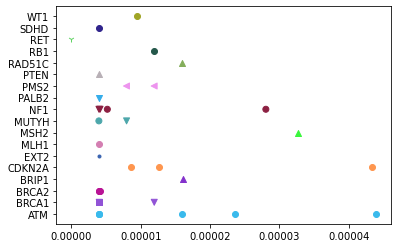

In [53]:
fig,ax=plt.subplots()

m={}
c=0
for t,d in df_filter.groupby('gene'):
    mm=[]
    for _ in d['effect']:
        if _ in m:
            mm.append(m[_])
        else:
            m[_]=list(Line2D.markers)[c]
            c=c+1    
                
    mscatter(d['AF exome'],d['gene'],color=randCol(),m=mm,ax=ax)
ax.xaxis.get_major_formatter().set_scientific(False)

/tmp/ipykernel_4768/2464634141.py:6: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(d['AF exome'],d['gene'],color='black'
/tmp/ipykernel_4768/2464634141.py:6: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('2').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(d['AF exome'],d['gene'],color='black'


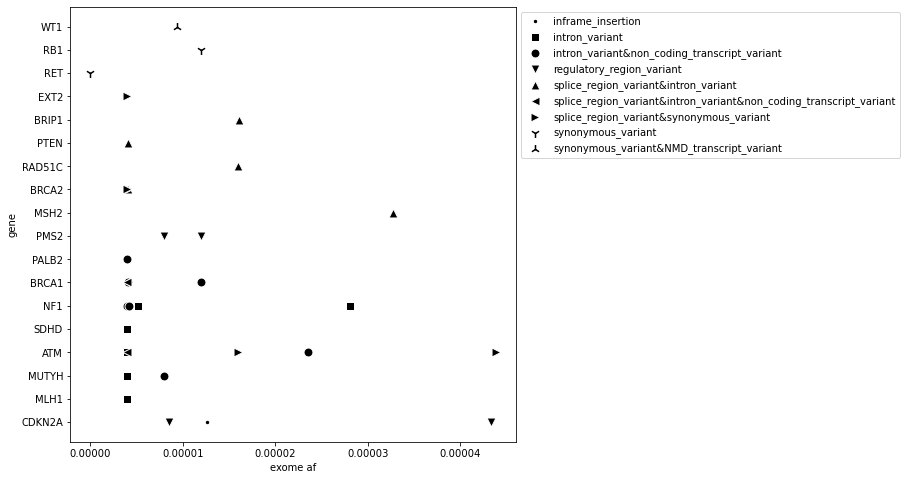

In [71]:
fig,ax=plt.subplots(figsize=(8,8))

m={}
c=0
for t,d in df_filter.groupby('effect'):
    ax.scatter(d['AF exome'],d['gene'],color='black'
               ,marker=list(Line2D.markers)[c],label=t,edgecolor='white',s=80)
    c=c+1
ax.xaxis.get_major_formatter().set_scientific(False)
ax.set_ylabel('gene')
ax.set_xlabel('exome af')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

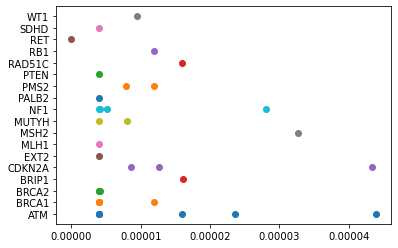

In [33]:
fig,ax=plt.subplots()


ax.scatter(df_filter['AF exome'],df_filter['gene'])
ax.xaxis.get_major_formatter().set_scientific(False)

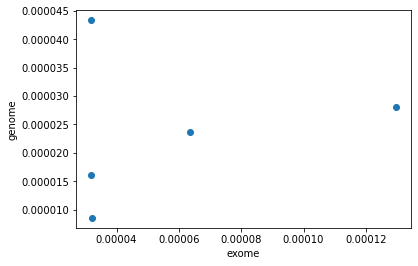

In [23]:
fig,ax =plt.subplots()
ax.scatter(df['AF genome'],df['AF exome'])
ax.set(ylabel='genome',xlabel='exome')

#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1'))
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

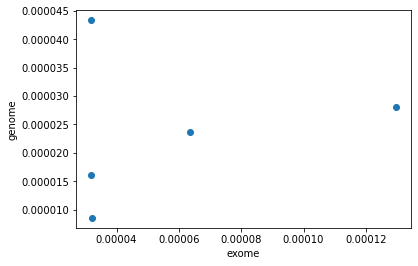

In [22]:
fig,ax =plt.subplots()
ax.scatter(df['AF genome'],df['AF exome'])
ax.set(ylabel='genome',xlabel='exome')

#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1'))
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(True)

In [ ]:
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

In [ ]:
'../DEV/ClinVar_VEPanno_filterNonCoding_08_12_2021.xlsx'